

#Vježbe 6 - 06.04.2023 - Linearna regresija



https://www.youtube.com/watch?v=zPG4NjIkCjc&ab_channel=statisticsfun

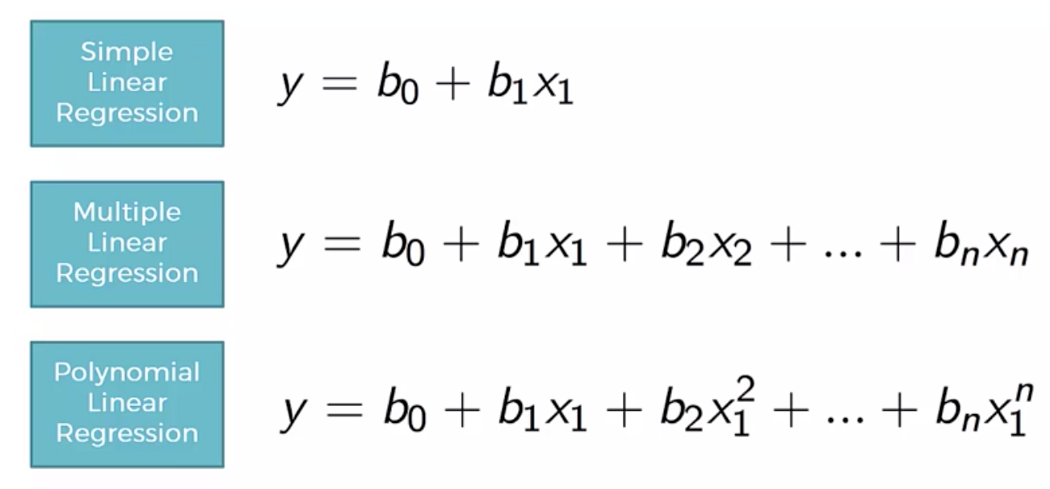

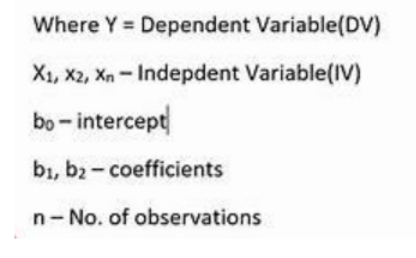

#Linearna regresija

Procjene parametara pomoću metode najmanjih kvadrata. Cilj je odrediti procjene parametara za koje je rezidualni zbroj kvadrata minimalan



Utječe li visina na težinu ljudi?

##Dohvacanje podataka

In [55]:
from sklearn import datasets
baza=datasets.fetch_openml('bodyfat')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name bodyfat exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [56]:
baza.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [57]:
import numpy as np
podaci=np.array(baza.data)
podaci

array([[  1.0708,  23.    , 154.25  , ...,  32.    ,  27.4   ,  17.1   ],
       [  1.0853,  22.    , 173.25  , ...,  30.5   ,  28.9   ,  18.2   ],
       [  1.0414,  22.    , 154.    , ...,  28.8   ,  25.2   ,  16.6   ],
       ...,
       [  1.0328,  72.    , 186.75  , ...,  31.3   ,  27.2   ,  18.    ],
       [  1.0399,  72.    , 190.75  , ...,  30.5   ,  29.4   ,  19.8   ],
       [  1.0271,  74.    , 207.5   , ...,  33.7   ,  30.    ,  20.9   ]])

In [58]:
baza.feature_names

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

In [59]:
tezina=podaci[:,2]   #zavisna varijabla
tezina=tezina*0.46

In [60]:
visina=podaci[:,3]*2.54  #nezavisna


In [61]:
X=visina
y=tezina

###Grafički prikaz podataka

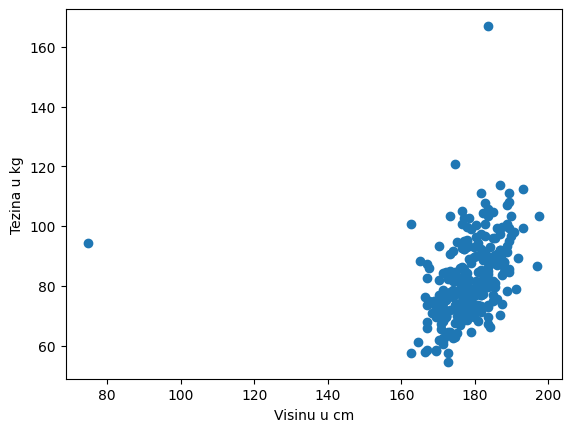

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('Visinu u cm')
plt.ylabel('Tezina u kg')
plt.show()

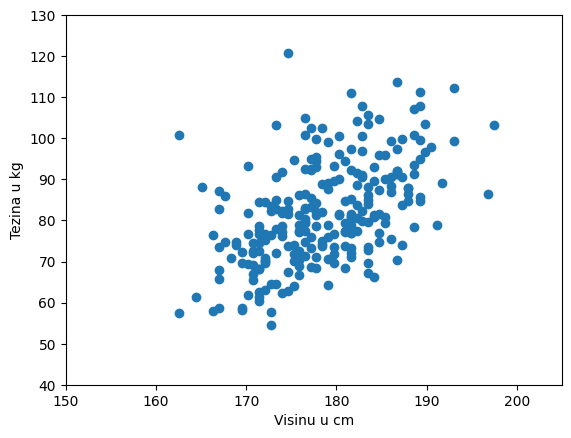

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('Visinu u cm')
plt.ylabel('Tezina u kg')
plt.xlim(150,205)
plt.ylim(40,130)
plt.show()

##Model linearne regresije

In [64]:
X.shape


(252,)

In [65]:
X=X.reshape(-1,1)

In [66]:
X.shape

(252, 1)

In [67]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X,y)

In [68]:
reg.coef_  #nagib pravca

array([0.44795538])

In [69]:
reg.intercept_  #gdje sjeće os x

2.489442578181979

In [70]:
y_predvideno=reg.predict(X)

###Koeficijent determinacije
* Relativna mjera prilagođenosti regresijskog pravca
empirijskim podacima
* Dobiva se kao omjer zbroja kvadrata odstupanja tumačenog modelom regresije i ukupnog zbroja kvadrata odstupanja (razlika između izmjerene i prosječne
vrijednosti)
* Model je reprezentativniji što je koeficijent determinacije bliži jedinici (0 – nema veze, 1 - potpuna veza)

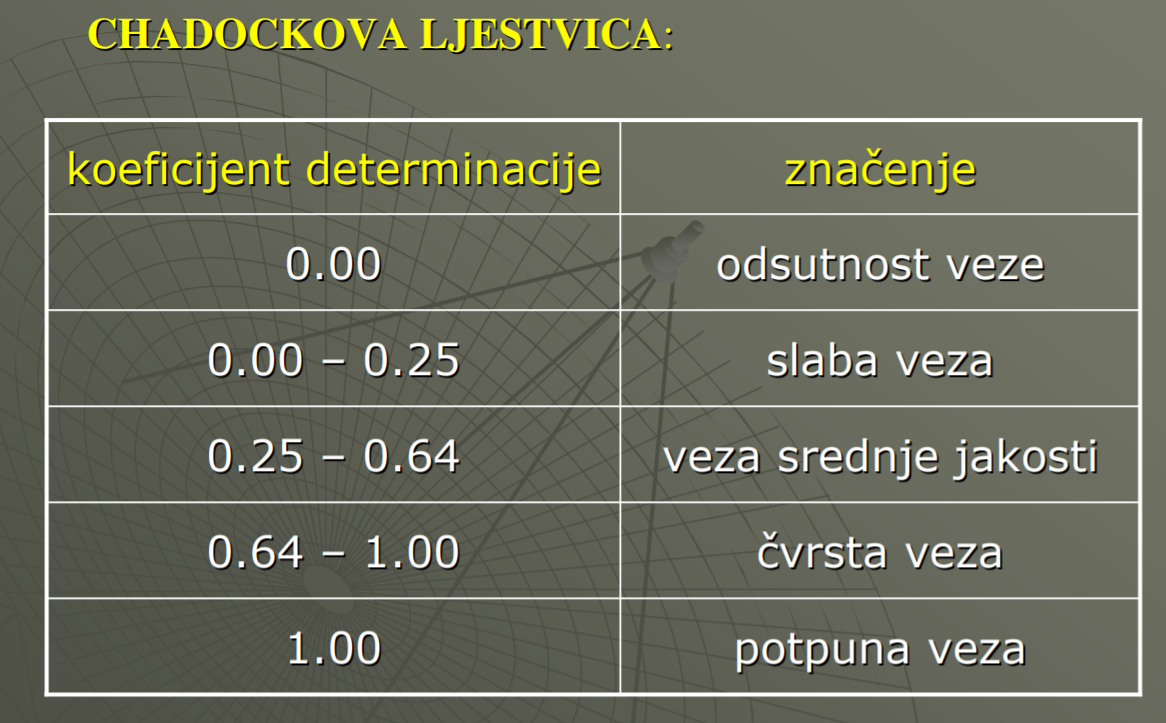

In [71]:
reg.score(X,y)

0.09503565825166804

###Rezidualna odstupanja
* Odstupanja izmjerenih vrijednosti zavisne varijable od regresijskih vrijednosti.
* Model regresije je reprezentativniji što su manja rezidualna odstupanja

In [72]:
visina_21=X[20,0]
stvarna_tezina_21=y[20]
dobivena_tezina_21=round(y_predvideno[20],2)

In [73]:
print("21. osoba u bazi je visoka {} cm, njena stvarna tezina je {}, a tezina dobivena  regresijskim modelom je {} ".format(visina_21,stvarna_tezina_21,dobivena_tezina_21))

21. osoba u bazi je visoka 172.72 cm, njena stvarna tezina je 82.34, a tezina dobivena  regresijskim modelom je 79.86 


In [75]:
residualno_odstupanje_21= round(abs(stvarna_tezina_21-dobivena_tezina_21),2)
residualno_odstupanje_21

2.48

###Varijanca (eng. Mean squared error)
* prosječno kvadratno odstupanje 
* dobiva se tako da se zbroj kvadrata rezidualnih odstupanja podijeli brojem podataka
* https://www.statisticshowto.com/mean-squared-error/

The smaller the mean squared error, the closer you are to finding the line of best fit

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predvideno)

164.7383281629607

###Predviđanje za nepoznatu vrijednost

In [77]:
reg.predict([[180]])

array([83.12141156])

###Grafički prikaz rezultata

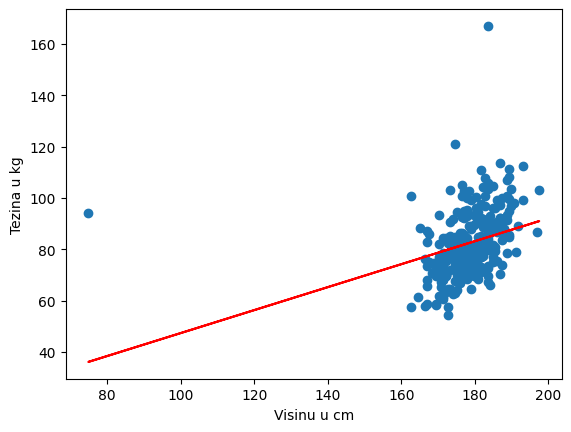

In [80]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,y_predvideno,'r')
plt.xlabel('Visinu u cm')
plt.ylabel('Tezina u kg')
#plt.xlim(150,205)
#plt.ylim(40,130)
plt.show()

###Optimizacija

####Izbacivanje outliera 

In [81]:
outlier_X=np.where(X<150)
outlier_X

(array([41]), array([0]))

In [82]:
outlier_y=np.where(y>120)
outlier_y

(array([38, 40]),)

In [83]:
outlier_index=[38,40,41]

In [84]:
X_novi=np.delete(X,outlier_index)
y_novi=np.delete(y,outlier_index)

In [85]:
X_novi.shape

(249,)

In [86]:
X_novi=X_novi.reshape(-1,1)

In [88]:
X_novi.shape

(249, 1)

In [89]:
reg_novi=LinearRegression().fit(X_novi,y_novi)


In [90]:
reg_novi.score(X_novi,y_novi)

0.2823760636283553

In [92]:
y_predvideno_novi=reg_novi.predict(X_novi)

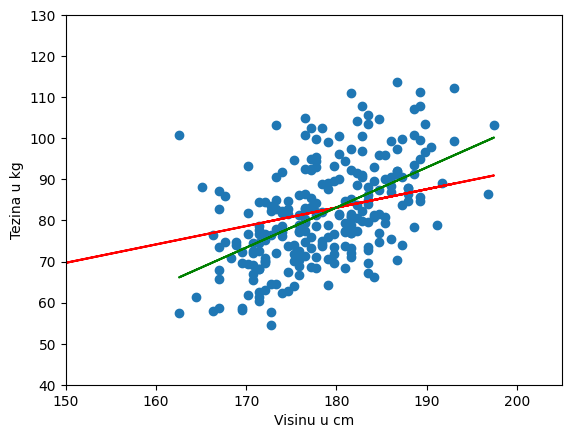

In [94]:
import matplotlib.pyplot as plt
plt.scatter(X_novi,y_novi)
plt.plot(X,y_predvideno,'r')
plt.plot(X_novi,y_predvideno_novi, 'g')
plt.xlabel('Visinu u cm')
plt.ylabel('Tezina u kg')
plt.xlim(150,205)
plt.ylim(40,130)
plt.show()

In [95]:
mean_squared_error(y_novi,y_predvideno_novi)

106.60012774583558

####Spuštanje gradijenata (eng. Gradient descent)

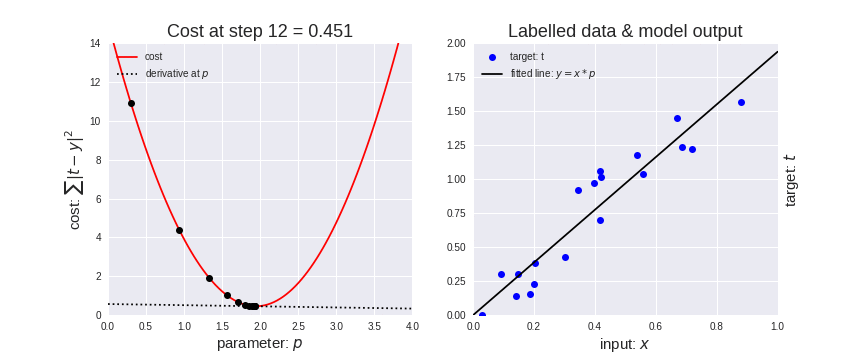

gif: https://camo.githubusercontent.com/a401a48f5503c52004369148a784e779aa7e3411/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a70775049472d475748796150564d564747354f6841512e676966

implementacija: https://sites.google.com/view/ml-basics/linear-regression-and-gradient-descent

#Multivarijatna linearna regresija

Utječu li konjska snaga, težina i ubrzavanje automobila na potrošnju goriva?

In [96]:
baza=datasets.fetch_openml('cars')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name cars exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [97]:
baza.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [99]:
baza.data.shape

(406, 7)

In [100]:
baza.feature_names

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model.year']

In [101]:
podaci=np.array(baza.data)

In [102]:
X=podaci[50:100,3:6]
y=podaci[50:100,0]

In [103]:
X.shape

(50, 3)

In [104]:
np.amax(X,axis=0)   #o za max po stupcu, 1 za max po retku

array([208.0, 5140, 23.5], dtype=object)

In [105]:
np.amin(X,axis=0)

array([54.0, 1613, 11.0], dtype=object)

In [106]:
max(y)

35.0

In [107]:
min(y)

11.0

####Normalizacija podataka

In [ ]:
from sklearn.preprocessing import normalize

X_norm=normalize(X)
X_norm

In [110]:
y

array([13.0, 13.0, 18.0, 22.0, 19.0, 18.0, 23.0, 28.0, 30.0, 30.0, 31.0,
       35.0, 27.0, 26.0, 24.0, 25.0, 23.0, 20.0, 21.0, 13.0, 14.0, 15.0,
       14.0, 17.0, 11.0, 13.0, 12.0, 13.0, 19.0, 15.0, 13.0, 13.0, 14.0,
       18.0, 22.0, 21.0, 26.0, 22.0, 28.0, 23.0, 28.0, 27.0, 13.0, 14.0,
       13.0, 14.0, 15.0, 12.0, 13.0, 13.0], dtype=object)

In [ ]:
y_norm=y/max(y)
y_norm

In [112]:
reg_car=LinearRegression().fit(X_norm,y_norm)

In [113]:
reg_car.score(X_norm,y_norm)

0.8687714503417115

In [114]:
y_pred=reg_car.predict(X_norm)
mean_squared_error(y_norm,y_pred)

0.0042637601976157815

####Predviđanje vrijednosti

In [115]:
reg_car.predict(normalize([[100,3000,20]]))

array([0.62514169])

#Dodatni materijali - Polinomna regresija

* Možemo koristiti linearni model da odgovara za nelinearne podatke.
* A simple way to do this is to add power of each feature as new feature. Then train a linear model on this extnded set of features.


In [45]:
#imamo od prije
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  

#da nam svima budu jednake točke
#import numpy.random as rnd
np.random.seed(42)  

**Generiranje nelinearnih podataka**

In [46]:
#100 točka
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

**Prikaz podataka**

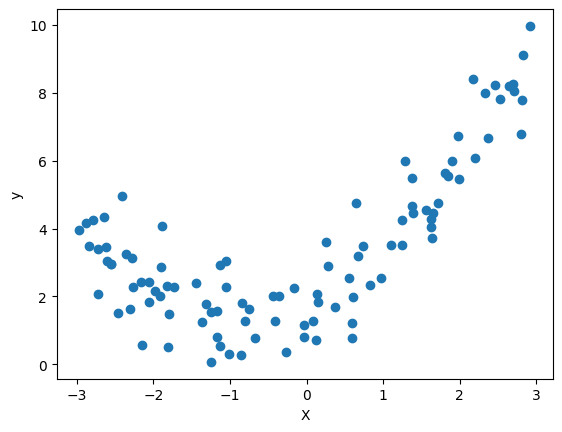

In [47]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [48]:
X[0]

array([-0.75275929])

**Dodavanje značajke za polinomnalnu regresiju**

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_znacajka = PolynomialFeatures(degree=2, include_bias=False) 
              #degree nam je stupanj funkcije, ako je 2 nam je kvadratna funkcija
X_poly = poly_znacajka.fit_transform(X) 
                #obzirom da su dva stupnja, dodajemo kvadrat


We see here that the transformer has converted our one-dimensional array into a two-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

In [50]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [51]:
#primjenjujeno linearnu regresiju
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

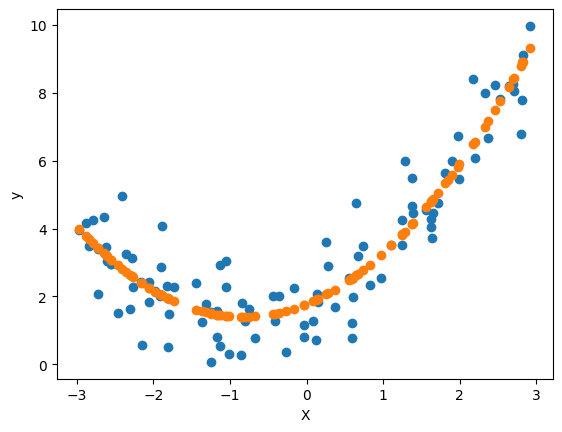

In [52]:
y_new = lin_reg.predict(X_poly)
plt.scatter(X, y)
plt.scatter(X, y_new)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

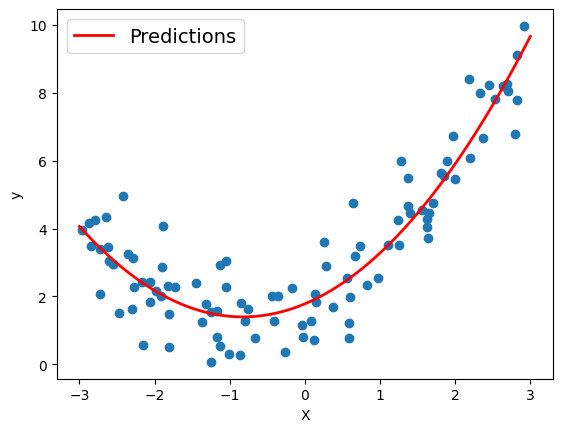

In [53]:
#da dobijemo lijepu crtu, ravnomjerno raspodjelimo točke i prediktamo

#u intervalu od -3 do 3, ravnomjerno 100 točaka
X_new=np.linspace(-3, 3, 100).reshape(100, 1) 
X_new_poly = poly_znacajka.transform(X_new) #kao i prije dodajemo značajku 
y_new = lin_reg.predict(X_new_poly)  # predvidimo vrijednosti 

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper left", fontsize=14)
plt.show()

**Pipeline**
* The sklearn.pipeline module implements utilities to build a composite  estimator, as a chain of transforms and estimators.
* https://scikit-learn.org/stable/modules/classes.html?highlight=pipeline#module-sklearn.pipeline
* ovaj koj cemo koristiti: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

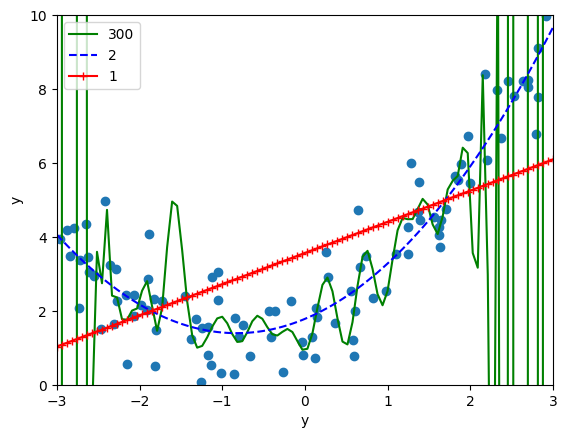

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, degree in (("g-", 300), ("b--", 2), ("r-+",1)): 
   #kako hocemo crtati, boja i oznaka i onda stupanj polinoma
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()  
        #Standardize features by removing the mean and scaling to unit variance 
        #Treba nam za ove visokog stupnja, za pravac i kvadratnu ne treba
        #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    
    lin_reg = LinearRegression()

    #Sequentially apply a list of transforms and a final estimator. 
    #Intermediate steps of the pipeline must be ‘transforms’,
    # that is, they must implement fit and transform methods. 
    #The final estimator only needs to implement fit.
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree))

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.xlabel("y")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])

plt.show()